<a href="https://colab.research.google.com/github/ddarshana04/Geospatial-Deep-Learning-for-Estimating-Socioeconomic-Well-being-in-Developing-Regions/blob/main/5)Satellite_Image_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into Colaboratory:

import os
import os.path
import numpy as np
import time
import scipy
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [ ]:
!pip install scikit-learn

In [ ]:

import sklearn.utils.validation
sklearn.utils.validation.__dict__

{'__name__': 'sklearn.utils.validation',
 '__doc__': 'Utilities for input validation',
 '__package__': 'sklearn.utils',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7d878ee638b0>,
 '__spec__': ModuleSpec(name='sklearn.utils.validation', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7d878ee638b0>, origin='/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py'),
 '__file__': '/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py',
 '__cached__': '/usr/local/lib/python3.10/dist-packages/sklearn/utils/__pycache__/validation.cpython-310.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class_

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling
# Import constraints from tensorflow.keras
from tensorflow.keras.constraints import max_norm

# Import other modules as needed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Conv2D, AveragePooling2D  # Change the import statement
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from multiprocessing import Pool
import os
import time
import pandas as pd
import numpy as np
from keras.models import Model
import pickle

import torchsummary
import torchvision
import torch


In [ ]:
!pip install https://github.com/fastai/fastai1/archive/master.zip

     - 132.1 MB 37.8 MB/s 0:00:08
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastai: filename=fastai-1.0.64.dev0-py3-none-any.whl size=241882 sha256=72bfcd900c23b7b9fa9b0867d8c1ab963a817a4bfae29f41a19ae1a1fc37de3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-o6mmn7go/wheels/9c/c8/3a/eab2c5dd0c630968f9b114e578eed07b8bde2e38900c376f00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=8a46b6607559812c5a506b46f25e61ecae32c5cdf7552a032bbb5c805b3fba67
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built fastai nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.14
    Uninstalling fastai-2.7.14:
      Successfully uninstalled fastai-2.7.14


In [ ]:

from fastai.vision import *
from fastai.widgets import *

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path = Path('/content/drive/MyDrive')


In [ ]:
dir_1 = '/content/drive/MyDrive/google_image_cnn/train/class_1'
dir_2 = '/content/drive/MyDrive/google_image_cnn/train/class_2'
dir_3 = '/content/drive/MyDrive/google_image_cnn/train/class_3'


In [ ]:
image_file_1 = os.listdir(dir_1)
image_file_2 = os.listdir(dir_2)
image_file_3 = os.listdir(dir_3)

In [ ]:
image_file_2[0]

'25175_9346.jpg'

low nighttime intensity


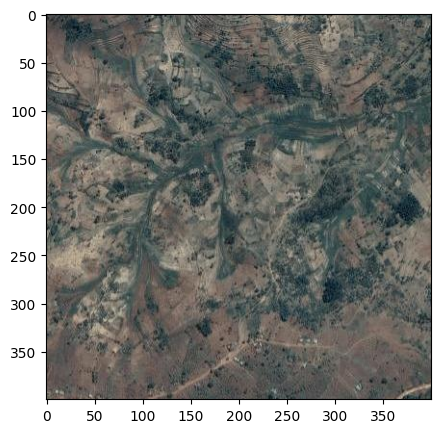

median nighttime intensity


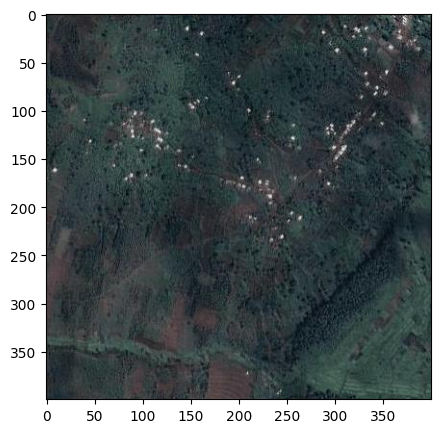

high nighttime intensity


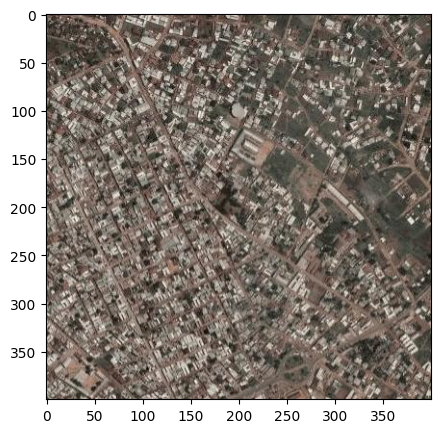

In [ ]:
low_file = dir_1+'/'+image_file_1[10]
med_file = dir_2+'/'+image_file_2[10]
high_file = dir_3+'/'+image_file_3[10]

# Display test images
figsize = (5,5)
#class1
print('low nighttime intensity')
plt.figure(figsize=figsize)
plt.imshow(mpimg.imread(low_file))
plt.show()

#class2
print('median nighttime intensity')
plt.figure(figsize=figsize)
plt.imshow(mpimg.imread(med_file))
plt.show()
#class3
print('high nighttime intensity')
plt.figure(figsize=figsize)
plt.imshow(mpimg.imread(high_file))
plt.show()

# ***Use transfer learning for cosine similarity***

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2


In [ ]:

from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf

# ***load pre-trained CNN model (VGG16)***

In [ ]:
#VGG
vgg16 = keras.applications.VGG16(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))



553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
# use “fc2” as extracted feature of image.
basemodel = Model(inputs=vgg16.input, outputs=vgg16.get_layer('fc2').output)


In [ ]:
basemodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

# function to extract features

def get_feature_vector(img):
    if img.shape[2] == 4:  # Check if image has 4 channels
        print("Skipping image with 4 color channels")
        return None  # Return None to indicate skipping this image

    print("Original Image Shape:", img.shape)
    img1 = cv2.resize(img, (224, 224))
    print("Resized Image Shape:", img1.shape)
    feature_vector = basemodel.predict(img1.reshape(1, 224, 224, 3))
    return feature_vector.flatten() if feature_vector is not None else None

In [ ]:

# calculate similarity
from scipy import spatial
def calculate_similarity(vector1, vector2):
  return 1 - spatial.distance.cosine(vector1, vector2)


In [ ]:

img1 = mpimg.imread(low_file)
img2 = mpimg.imread(med_file)
img3 = mpimg.imread(high_file)



In [ ]:
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)


Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 555ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 564ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 545ms/step


In [ ]:
print(f1.shape)
print(f2.shape)
print(f3.shape)

(4096,)
(4096,)
(4096,)


In [ ]:
print(calculate_similarity(f1, f2))
print(calculate_similarity(f2, f3))
print(calculate_similarity(f1, f3))

0.7297190427780151
0.6479096412658691
0.58478182554245


In [ ]:
def Bootstrap_stat(size=10):
    '''
    function to perform bootstrapping to calculate
    cosine simularity between two groups
    '''
    sim_11= np.empty(size)
    sim_22= np.empty(size)
    sim_33= np.empty(size)
    sim_12= np.empty(size)
    sim_23= np.empty(size)
    sim_13= np.empty(size)

    for i in range(size):
      data = range(len(image_file_1))
      bs1 = np.random.choice(data, size=2)
      bs2 = np.random.choice(data, size=2)
      bs3 = np.random.choice(data, size=2)

      low_file1 = dir_1+'/'+image_file_1[bs1[0]]
      med_file1 = dir_2+'/'+image_file_2[bs2[0]]
      high_file1 = dir_3+'/'+image_file_3[bs3[0]]
      low_file2 = dir_1+'/'+image_file_1[bs1[1]]
      med_file2 = dir_2+'/'+image_file_2[bs2[1]]
      high_file2 = dir_3+'/'+image_file_3[bs3[1]]

      img11 = mpimg.imread(low_file1)
      img21 = mpimg.imread(med_file1)
      img31 = mpimg.imread(high_file1)
      img12 = mpimg.imread(low_file2)
      img22 = mpimg.imread(med_file2)
      img32 = mpimg.imread(high_file2)

      f11 = get_feature_vector(img11)
      f21 = get_feature_vector(img21)
      f31 = get_feature_vector(img31)
      f12 = get_feature_vector(img12)
      f22 = get_feature_vector(img22)
      f32 = get_feature_vector(img32)

      # Skip if any feature vector is None
      if any(feature is None for feature in [f11, f21, f31, f12, f22, f32]):
          continue

      sim_12[i]=calculate_similarity(f11, f21)
      sim_23[i]=calculate_similarity(f21, f31)
      sim_13[i]=calculate_similarity(f11, f31)
      sim_11[i]=calculate_similarity(f11, f12)
      sim_22[i]=calculate_similarity(f21, f22)
      sim_33[i]=calculate_similarity(f31, f32)

    return pd.DataFrame({'sim11':sim_11, 'sim22':sim_22, 'sim33':sim_33,
                         'sim12':sim_12, 'sim23':sim_23, 'sim13':sim_13})


In [ ]:
df_sim= Bootstrap_stat(size=1000)

Streaming output truncated to the last 5000 lines.
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 543ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 566ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 575ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 550ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 566ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 580ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 560ms/step
Original Image Shape: (400, 400, 3)
Resized Image Shape: (224, 224, 3)
1/1 [==============================] - 1s 570m

In [ ]:
df_sim.describe()

,sim11,sim22,sim33,sim12,sim23,sim13
count,9.940000e+02,986.000000,985.000000,982.000000,9.870000e+02,979.000000
mean,9.145907e+273,0.555792,0.438966,0.541390,5.777504e+151,0.447725
std,inf,0.231962,0.207438,0.235069,inf,0.208642
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5.040764e-01,0.510996,0.358830,0.468058,3.879448e-01,0.363328
50%,6.452677e-01,0.627156,0.460083,0.607157,5.019102e-01,0.470181
75%,7.459701e-01,0.704099,0.583091,0.708800,6.181877e-01,0.590663
max,9.091031e+276,1.000000,1.000000,0.911866,2.851198e+154,0.890615


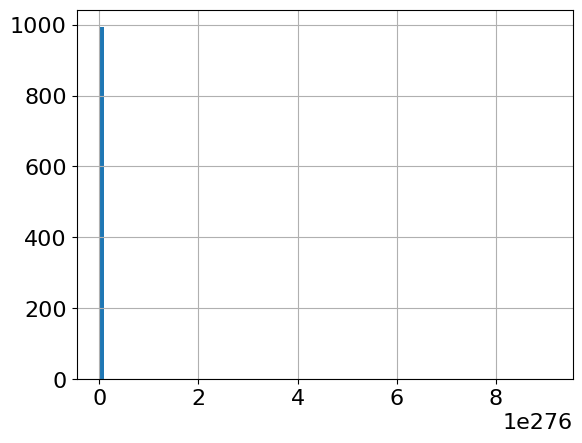

In [ ]:
ax = df_sim.sim11.hist(bins=100)
df_sim.sim22.hist(bins=100, ax=ax)
df_sim.sim33.hist(bins=100, ax=ax)
plt.show()

<Figure size 800x600 with 0 Axes>

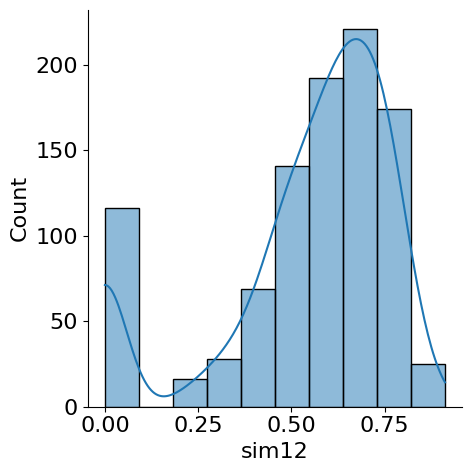

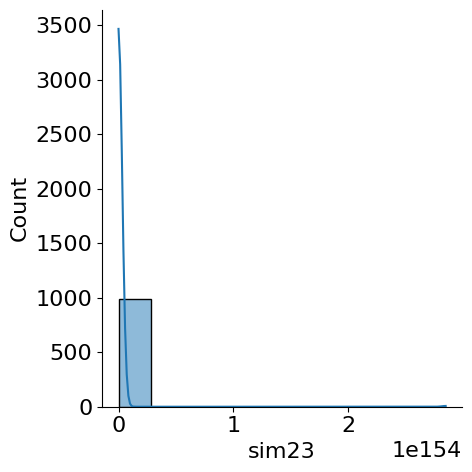

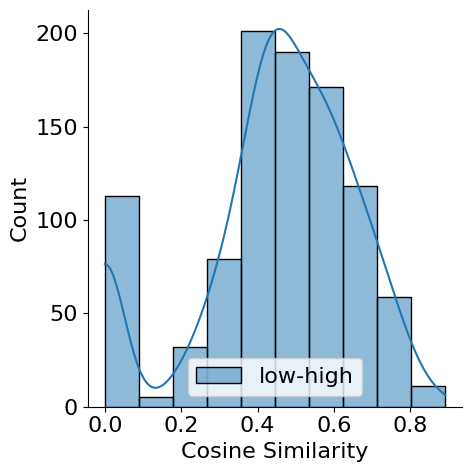

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})

sns.displot(df_sim.sim12, bins=10, kde=True, label='low-medium')
sns.displot(df_sim.sim23, bins=10, kde=True, label='medium-high')
sns.displot(df_sim.sim13, bins=10, kde=True, label='low-high')

plt.legend()
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.show()


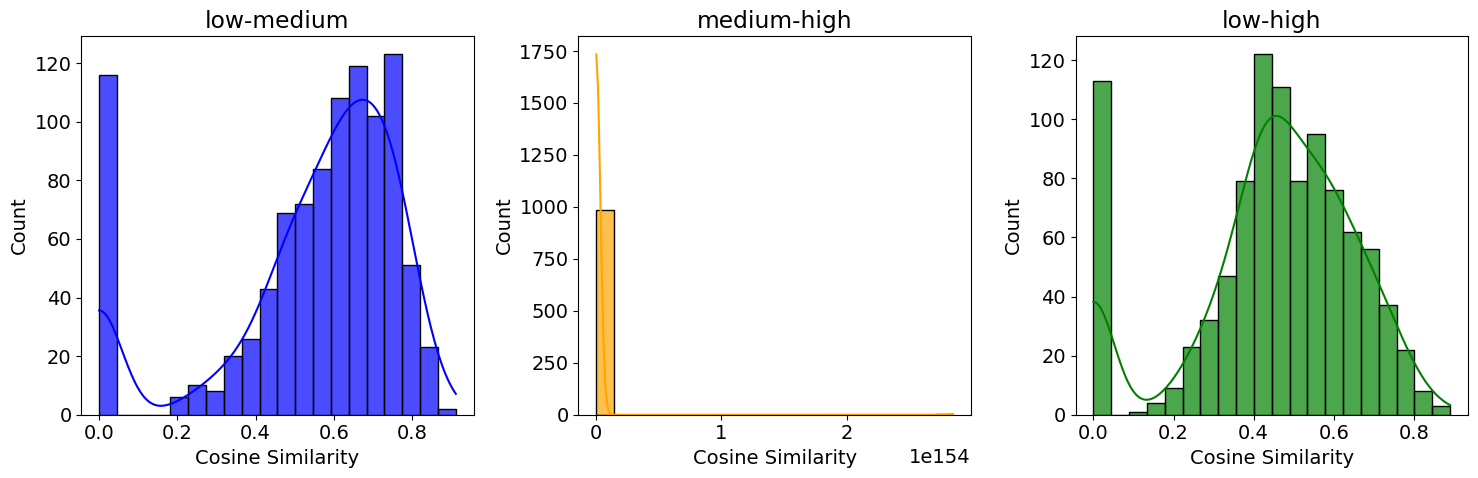

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 14})

# Plot histogram for sim12
plt.subplot(1, 3, 1)
sns.histplot(df_sim.sim12, bins=20, kde=True, color='blue', alpha=0.7)
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.title('low-medium')

# Plot histogram for sim23
plt.subplot(1, 3, 2)
sns.histplot(df_sim.sim23, bins=20, kde=True, color='orange', alpha=0.7)
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.title('medium-high')

# Plot histogram for sim13
plt.subplot(1, 3, 3)
sns.histplot(df_sim.sim13, bins=20, kde=True, color='green', alpha=0.7)
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.title('low-high')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

print("Number of missing values in rvs1:", np.isnan(rvs1).sum())
print("Number of missing values in rvs2:", np.isnan(rvs2).sum())


Number of missing values in rvs1: 6
Number of missing values in rvs2: 14


In [ ]:
import numpy as np

# Mean imputation
mean_rvs1 = np.nanmean(rvs1)
mean_rvs2 = np.nanmean(rvs2)

rvs1_imputed = np.where(np.isnan(rvs1), mean_rvs1, rvs1)
rvs2_imputed = np.where(np.isnan(rvs2), mean_rvs2, rvs2)

# Median imputation
median_rvs1 = np.nanmedian(rvs1)
median_rvs2 = np.nanmedian(rvs2)

rvs1_imputed = np.where(np.isnan(rvs1), median_rvs1, rvs1)
rvs2_imputed = np.where(np.isnan(rvs2), median_rvs2, rvs2)


In [ ]:
# Find indices of non-missing values
not_nan_indices_rvs1 = ~np.isnan(rvs1)
not_nan_indices_rvs2 = ~np.isnan(rvs2)

# Keep only non-missing values
rvs1_cleaned = rvs1[not_nan_indices_rvs1]
rvs2_cleaned = rvs2[not_nan_indices_rvs2]

# Ensure both arrays have the same length after removing missing values
min_length = min(len(rvs1_cleaned), len(rvs2_cleaned))
rvs1_cleaned = rvs1_cleaned[:min_length]
rvs2_cleaned = rvs2_cleaned[:min_length]


In [ ]:
import numpy as np
from scipy import stats

# Handle missing values
rvs1 = df_sim.sim11.dropna().values
rvs2 = df_sim.sim22.dropna().values

# Perform t-test
t_stat, p_value = stats.ttest_ind(rvs1, rvs2)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 0.0
P-value: 1.0


In [ ]:
import numpy as np
from scipy import stats

# Handle missing values
rvs2 = df_sim.sim22.dropna().values
rvs3 = df_sim.sim33.dropna().values

# Perform t-test
t_stat, p_value = stats.ttest_ind(rvs2, rvs3)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 11.78515363286739
P-value: 4.99941973218712e-31
